# Classifier 8: Neural Network

* Node layers, containing an input layer, one or more hidden layers, and an output layer
* Each node connected to 1 layer above and below, has weight and threshold
* If the output of any individual node is above the specified threshold value, that node is activated, sending data to the next layer of the network. Else not do anything
* Examples: Multi-layer Perceptron (feedforward), recurrent (RNN), convulotional (CNN)
* Uses activation function (ex. sigmoid, log) to determine node activation
* Algorithms: backpropogate to tune weighting for node

In [14]:
# Classifier: Neural Network(h) - feedforward

# 6.h.1 Modelling - Implementing Model

# Import required modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Classification using support vector classifier with polynomial kernel
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Reading the processed data from local directory
processed_train=pd.read_csv("/Users/alexmak/Desktop/CMPUT/Personal/summer2023/TitanicProject/Data/Processed_Data/scaled_train.csv")
processed_test=pd.read_csv("/Users/alexmak/Desktop/CMPUT/Personal/summer2023/TitanicProject/Data/Processed_Data/scaled_test.csv")
target=pd.read_csv("/Users/alexmak/Desktop/CMPUT/Personal/summer2023/TitanicProject/Data/Processed_Data/target.csv")

# split the training data, test with sizes 
X_train, X_test, y_train, y_test = train_test_split(processed_train, target, test_size=0.2)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

# Train the model with the default settings
MLP_clf = MLPClassifier(max_iter=1000)

# Fit the clasifier model
MLP_clf.fit(X_train, y_train)

# make predictions from model
y_pred=MLP_clf.predict(X_test)

(712, 11) (179, 11)
(712, 1) (179, 1)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
# 6.h.2 Modelling - model analysis

# use permutation importance to find feature importance in Gaussian NB
from sklearn.inspection import permutation_importance


print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred))) 
# 75-78%

print(classification_report(y_test,y_pred))

Accuracy: 0.7932960893854749
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       115
           1       0.72      0.69      0.70        64

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



In [16]:
# 6.h.3 Modelling - Hyperparamater Tuning and model optimization

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# Dropping some columns based on feature importance
# new_train = scaled_train.drop(['Alone','Parch','Embarked', 'Pclass', 'PassengerId','Cabin'], axis=1)
# new_test = scaled_test.drop(['Alone','Parch','Embarked', 'Pclass', 'PassengerId','Cabin'], axis=1)

# default
new_train=processed_train
new_test=processed_test

# 80-20 split
X_train, X_test, y_train, y_test = train_test_split(new_train, target, test_size=0.2)

# fit the classifier for tuning hyperparameter
MLP_clf = MLPClassifier(max_iter=1000)

# Grid search CV (cross validation) to find the best hyperparameters for tuning
MLP_param_grid = {
    'alpha': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100],
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
#     'solver' : ['lbfgs', 'sgd', 'adam'],
    'tol': [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10],
    'max_iter': [1000, 10000, 100000, 1000000],
    'hidden_layer_sizes': [
        (1,),(2,),(3,),(4,),(5,),(6,),(7,),(8,),(9,),(10,),(11,), (12,),(13,),(14,),(15,),(16,),(17,),(18,),(19,),(20,),(21,)
    ]
}

# Perform Hyperparameter Tuning
MLP_ran_search = RandomizedSearchCV(MLP_clf, MLP_param_grid)
MLP_ran_search.fit(X_train, y_train)

print(MLP_ran_search.best_estimator_)

# Fit the tuned model
tuned_MLP_clf=MLP_ran_search.best_estimator_
tuned_MLP_clf.fit(X_train, y_train)

# Tuned model make predictions on test
y_pred = tuned_MLP_clf.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framewo

MLPClassifier(alpha=1, hidden_layer_sizes=(21,), max_iter=10000)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Tuned Accuracy: 0.7877094972067039
Your submission was successfully saved!


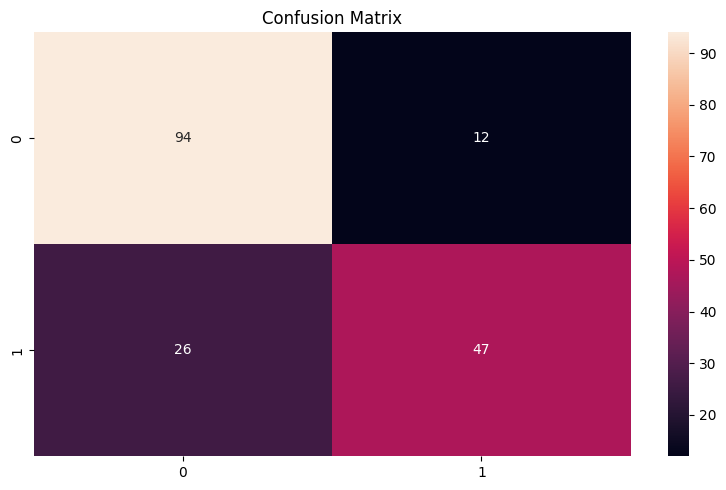

In [17]:
# 6.h.4 Modelling - Result Presentation

# Accuracy Score, can go as high as 85%
print("Tuned Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred))) # 75~77%

# Classification report
# print(classification_report(y_test,y_pred))

# Confusion matrix (TP, FP, TN, NN)
conf_matrix=confusion_matrix(y_test, y_pred)

# Seaborn heatmap
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()

# make predictions on testing data again
prediction = tuned_MLP_clf.predict(new_test)
# Make a new column to store the predictions
new_test['Survival_Predictions'] = pd.Series(prediction)

# Submit Output in Kaggle 
output = pd.DataFrame({'PassengerId': new_test.PassengerId, 'Survived': prediction})

# Assign output to a csv file
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

# Summary of Neural Network:

## Kaggle Accuracy:
* 0.76076, 0.76076, 0.77511, 0.75837, 0.76794

## Advantages:  
* Flexible (can used in both regression and classification)
* Good with nonlinear data with large # of inputs (ex. images)
* Once trained, fast predictions
* Can be trained with any # of input and layers (better with more data)

## Disadvantages:  
* Computationally expensive
* Black Box Model (hard to know things inside)
* Prone to overfitting and regularization